In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /opt/anaconda3/envs/PythonML/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

# EDA

In [12]:
# Displaying df with all columns available 
pd.set_option("display.max_columns",None)

In [30]:
# Reading data into dataframe 
df = pd.read_csv(os.path.join("..","Data","exoplanet_data.csv"))
df.koi_disposition.unique()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929,176.40,152.77,-77.60,8.4,1,5638,169,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088,4500.53,3406.38,-1175.26,453.3,1,5638,139,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608,1585.81,1537.86,-502.22,10.6,1,6119,165,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218,5713.41,5675.74,-1836.94,12.3,1,6173,193,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [31]:
# Checking for null values
for column in df.columns:
    print(f'{column} : {df.loc[:,column].isnull().sum()}')

koi_disposition : 0
koi_fpflag_nt : 0
koi_fpflag_ss : 0
koi_fpflag_co : 0
koi_fpflag_ec : 0
koi_period : 0
koi_period_err1 : 0
koi_period_err2 : 0
koi_time0bk : 0
koi_time0bk_err1 : 0
koi_time0bk_err2 : 0
koi_impact : 0
koi_impact_err1 : 0
koi_impact_err2 : 0
koi_duration : 0
koi_duration_err1 : 0
koi_duration_err2 : 0
koi_depth : 0
koi_depth_err1 : 0
koi_depth_err2 : 0
koi_prad : 0
koi_prad_err1 : 0
koi_prad_err2 : 0
koi_teq : 0
koi_insol : 0
koi_insol_err1 : 0
koi_insol_err2 : 0
koi_model_snr : 0
koi_tce_plnt_num : 0
koi_steff : 0
koi_steff_err1 : 0
koi_steff_err2 : 0
koi_slogg : 0
koi_slogg_err1 : 0
koi_slogg_err2 : 0
koi_srad : 0
koi_srad_err1 : 0
koi_srad_err2 : 0
ra : 0
dec : 0
koi_kepmag : 0


In [32]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

## Removing columns

The data dictionary can be found at this <a href="https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html"> link </a>. In order to determine what columns were significant to the ML model I needed to do some research into what the column values represent. The following will be my thought process into determing what columns were necessary to the model.

Based on initial investigation, it appears as though each value, i.e. period, has an error 1 and an error 2 value. After reading into the documentation, the error values are uncertainties based on their respective measurements. Data columns with err1 and err2 represent transit properties of the Kepler Object of Interest and are "best fit parameters produced by a Mandel-Agol (2002) fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris" (<a href="https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html"> citation </a>). That is a lot of academic jargon but basically means that they are themselves predictions or estimations based on a model and therefore have margins of error. For that reason, I will remove columns that represent the uncertainty of the original model and will hold that assumption through the building of the model.

After removing the error columns, all of my models R-squared measures of accuracy dropped. The most drastic drop in accuracy occured in the logisitic regression. Before removing the error scores the model had an accuracy score of 88.27% on the test dataset and after removing the columns had an accuracy score of 81.98% on the test dataset. I will make a push to the remote repository for documentation of this phenomena for future reference but will continue with model building by commenting out the following cells of code. 

In [33]:
labels = []
for column in df.columns:
    if "err" in column:
        labels.append(column)

In [36]:
df.drop(columns=labels, inplace=True)

In [38]:
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,132.016100,0.765,4.80600,87.7,1.11,929,176.40,8.4,1,5638,4.296,1.088,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088,4500.53,453.3,1,5638,4.529,0.903,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,133.001270,0.043,3.11400,48.5,0.72,1608,1585.81,10.6,1,6119,4.444,1.031,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,132.181750,0.147,0.86500,103.6,1.07,2218,5713.41,12.3,1,6173,4.447,1.041,294.16489,47.176281,15.385


In [39]:
# Descriptive stats
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,164.488820,0.730631,5.549368,2.391190e+04,121.194193,1095.152768,8.263769e+03,276.038764,1.233729,5700.682449,4.305049,1.740749,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,67.020475,3.346956,6.425205,8.241240e+04,3519.737626,856.234809,1.775255e+05,824.788481,0.650089,802.060405,0.439238,5.903415,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,120.515914,0.000000,0.167000,7.500000e+00,0.140000,92.000000,2.000000e-02,1.600000,1.000000,2661.000000,0.047000,0.109000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,132.683917,0.198000,2.446000,1.604000e+02,1.400000,554.000000,2.227000e+01,12.400000,1.000000,5297.000000,4.209000,0.829000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,136.739230,0.539000,3.793000,4.245000e+02,2.420000,888.000000,1.466700e+02,23.700000,1.000000,5757.000000,4.436000,0.999000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,169.937005,0.891000,6.197500,1.533250e+03,15.965000,1397.500000,9.006700e+02,82.250000,1.000000,6110.000000,4.543000,1.357000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,180.013000,301.720760,52.336010,19.065000


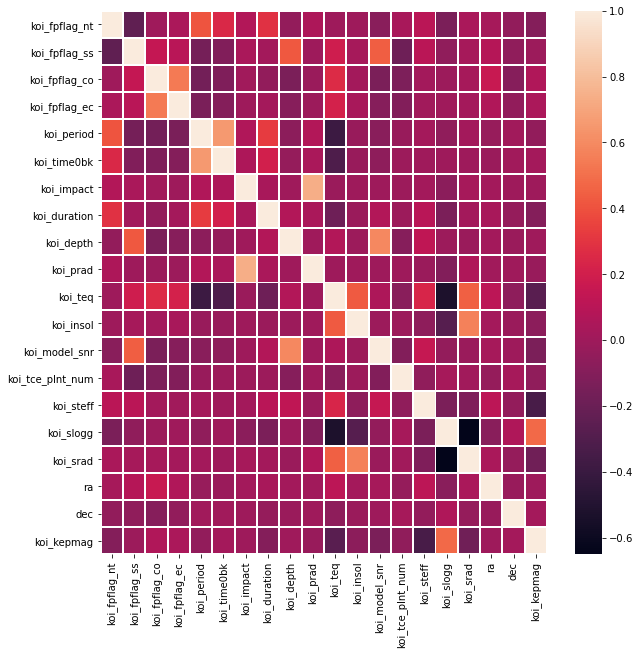

In [42]:
# Correlation matrix of inputs
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix,linewidths=1)
plt.show()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

## Create a Train Test Split

Use `koi_disposition` for the y values

In [43]:
# Dividing data into inputs and targets
targets = df.iloc[:,0]
inputs = df.iloc[:,1:]

# Shuffling data
shuffled_indicies = np.arange(inputs.shape[0])
np.random.shuffle(shuffled_indicies)

shuffled_inputs = inputs.loc[shuffled_indicies,:]
shuffled_targets = targets[shuffled_indicies]

# Splitting training and test datasets

X_train, X_test, y_train, y_test = train_test_split(shuffled_inputs, shuffled_targets, random_state=1)

In [44]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
5209,0,1,0,0,10.238940,132.722552,1.022,3.48510,3153.1,22.09,1190,474.05,427.6,1,6244,3.986,1.807,294.33350,44.870853,13.897
656,0,0,1,1,6.099012,135.523570,0.688,3.61120,227.5,3.16,1374,842.53,39.3,1,5743,3.881,1.971,296.71735,44.579659,13.951
3074,0,0,1,1,1.710281,131.626190,0.372,2.61000,111.6,0.91,1454,1055.42,13.8,1,5910,4.550,0.855,292.68515,41.905918,15.422
3699,1,0,0,0,8.646362,135.462230,0.294,8.73607,218070.0,54.24,1033,268.95,2441.7,1,6444,4.382,1.134,294.38858,43.690540,14.097
6,0,0,0,0,16.068647,173.621937,0.052,3.53470,4914.3,5.76,600,30.75,161.9,1,5031,4.485,0.848,286.99948,48.375790,15.841


In [45]:
# Scale input data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [46]:
# Save data to npz files
np.savez("../Data/Kepler_data_train",inputs = X_train_scaled, targets = y_train)
np.savez("../Data/Kepler_data_test",inputs = X_test_scaled, targets = y_test) 